In [97]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def mag2db(mag):
    return 20 * np.log10(mag)

def db2mag(db):
    return 10 ** (db / 20)

def plot_response(figure=None):
    if figure is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = figure

    def plot(w, h):
        ax.title.set_text('Filter Frequency Response and Phase Response')
        ax.semilogx(w, np.abs(h))
        ax.set_xlabel('Frequency [Hz]')
        ax.set_ylabel('Magnitude [dB]')
        ax.grid(which='both', axis='both')

        ax2 = ax.twinx()
        ax2.semilogx(w, np.angle(h), 'r')
        ax2.set_ylabel('Phase [radians]', color='r')
        ax2.grid(which='both', axis='both')

        # ax2 ensure the y-axis tick marks show common phase angles
        ax2.yaxis.set_major_locator(plt.MultipleLocator(base=np.pi/4))

        # ax2 format tick marks as multiples of pi/4 with mixed fractions
        def pi_formatter(x, _):
            pi = np.pi
            if x == 0:
                return "0"
            sign = "-" if x < 0 else ""
            x = abs(x)
            if x == pi:
                return f"{sign}$\pi$"
            elif x == pi / 2:
                return f"{sign}$\pi/2$"
            elif x == pi / 4:
                return f"{sign}$\pi/4$"
            elif x == 3 * pi / 4:
                return f"{sign}$3\pi/4$"
            else:
                return f"{sign}{x/pi:.2g}$\pi$"
        
        ax2.yaxis.set_major_formatter(plt.FuncFormatter(pi_formatter))

        plt.show()

    return plot

# Transfer function A - $2^{nd}$ order all-pass

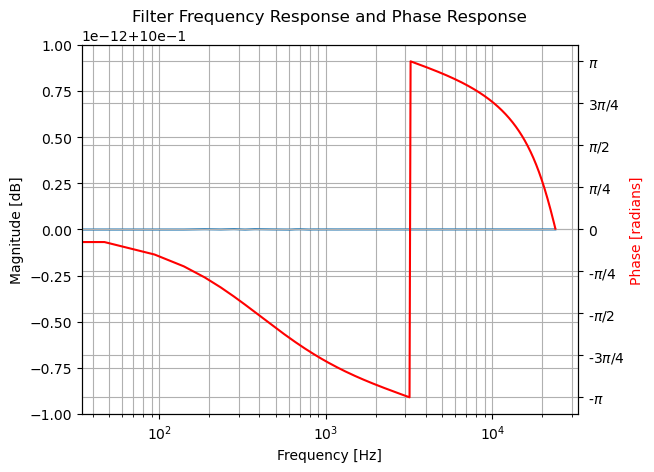

In [98]:
b = np.array([-0.2578122715960877, -0.6780222280014745, 1])
a = np.array([1, -0.6780222280014745, -0.2578122715960877])

response = scipy.signal.freqz(b, a, plot=plot_response(), fs=48000)


# Transfer function B

## B - $1^{st}$ order shelf

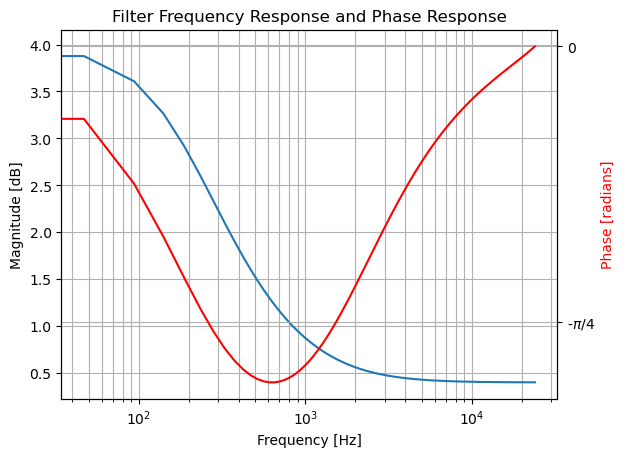

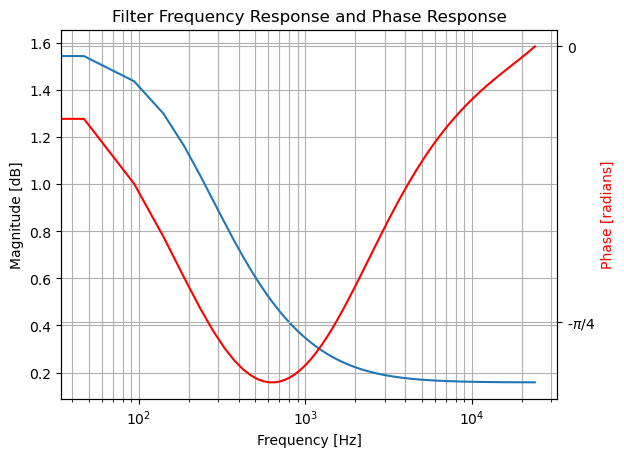

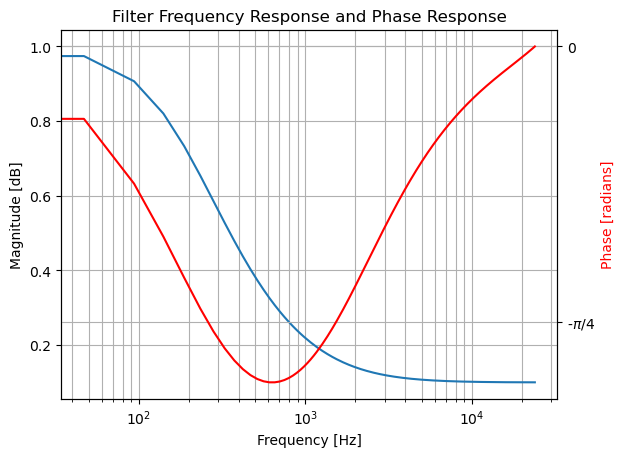

In [99]:
b = np.array([0.1116287524375113, -0.08578708035415286])
a = np.array([1, -0.9741583279166416])

for G in [12, 4, 0]:
    scipy.signal.freqz(db2mag(G) * b, a, plot=plot_response(), fs=48000)


## B - $2^{nd}$ order all-pass

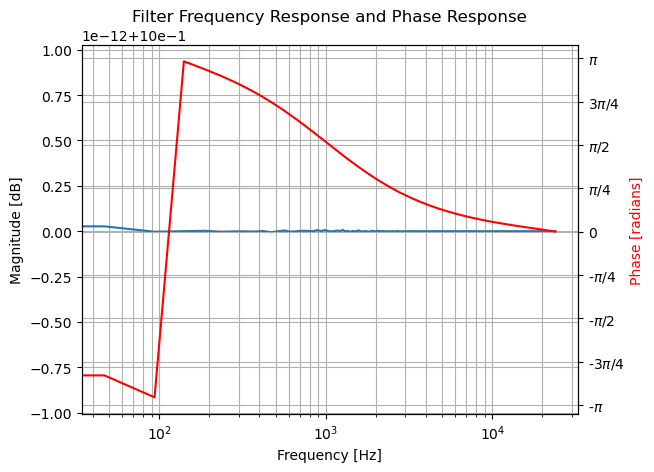

In [103]:
b = np.array([0.8723543367983998, -1.872103699532835, 1])
a = np.array([1, -1.872103699532835, 0.8723543367983998])

response = scipy.signal.freqz(b, a, plot=plot_response(), fs=48000)